# Tâches n° 8: Analyse de la structure de bande du matériau "LiLuO2"

Pour commencer, des informations concernant la structure électronique du matériau doit être trouvé. Pour cela, 

In [13]:
from pymatgen.ext.matproj import SpacegroupAnalyzer
from pymatgen.electronic_structure.dos  import DOS 
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter 
from pymatgen.electronic_structure.plotter import BSPlotterProjected
from pymatgen.ext.matproj import MPRester
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


with MPRester("xWGoUhg0LtBEwfAi") as m:
    structure = m.get_structure_by_material_id("mp-754537")
    truestru = SpacegroupAnalyzer(structure).get_primitive_standard_structure() 
    al = m.get_doc("mp-754537")
    dos = m.get_dos_by_material_id("mp-754537")
    bs = m.get_bandstructure_by_material_id("mp-754537")
   

## 1) La bande interdite

In [180]:
print("La bande interdite a une valeur ", dos.get_gap(), "eV")

La bande interdite a une valeur  4.614800000000001 eV


## 2.1) Direction où la dernière bande de valence présente le plus et le moins de dispersion.

Pour commencer il est nécessaire de déterminer quel est la dernière bande de valence. Pour cela, la classe "bandstructure" est utilée.

In [193]:
print(bs.get_vbm())#["band_index"])

{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}), 'kpoint_index': [86], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f017e48cf98>, 'energy': 0.9603, 'projections': {}}
1.08405428


Sur les informations données ci-dessus, on voit que la dernière bande de valence est la 11ème bande électronique du matériau. 
On peut donc déterminer les différents couple (energie,distance). 
Pour cela on utilise la classe "BSPlotter" qui va permettre de récupérer l'ensemble des données nécessaire. 

In [2]:
d = BSPlotter(bs).bs_plot_data() ##l'ensemble des données sous forme d'un dictionnaire

### Les énergies

In [11]:
d["energy"][0]["1"][11] 
# d["energy"] donne accès à la partie energie du dictionnaire d 
#le [0] correspond aux valeurs de l'énergie dans la première partie du graphe (entre Γ et L )
#le ["1"] indique le spin"
#le [11] est l'index de la 11ème bande, la dernière bande de valence
#Ce qui apparait est donc l'ensemble des valeurs de l'énergie sur cette bande à cet endroit

[-0.10310000000000008,
 -0.10010000000000008,
 -0.09179999999999999,
 -0.08010000000000006,
 -0.0677000000000001,
 -0.05810000000000004,
 -0.05449999999999999,
 -0.059700000000000086,
 -0.07610000000000006,
 -0.1050000000000001,
 -0.14690000000000003,
 -0.20140000000000002,
 -0.26680000000000004,
 -0.3409000000000001,
 -0.42000000000000004,
 -0.49100000000000005,
 -0.48660000000000003,
 -0.47900000000000004,
 -0.46980000000000005,
 -0.46030000000000004,
 -0.4516,
 -0.4448000000000001,
 -0.4404,
 -0.43890000000000007]

### Les distances

In [27]:
d["distances"][0][0]
#d["distances"] donne accès à la partie distance du dictionnaire d
# le [0] correspond aux tableaux des positions de la première partie du graphe (entre Γ et L dans notre cas )
# le [0] est la première position 

24

Avec ces informations, le graphe peut être parcouru de gauche à droite par itération.
Je vais procédé de cette manière : 
Prenons le cas de la première itération : 
- Les valeurs de l'énergie en Γ et en L seront prise 
- La distance de cette partie sera récupérée 
- Le calcul de la pente sera effectuée c'est-à-dire : (energie en L - energie Γ ) / distance
- A chaque itération je vérifierais si cette pente est plus grande ou plus petite de la précédente et je pourrais trouver ainsi la dispertion la plus grande et la plus petite.


In [9]:
pentemin = 999999
pentemax = -999999
endroitmax = 0
endroitmin = 0
for i in range(0,9) :
    lend = len(d["energy"][i]["1"][11])
    
    gauche = d["energy"][i]["1"][11][0]
    droite = d["energy"][i]["1"][11][lend-1]
    
    pg = d["distances"][i][0]
    pd = d["distances"][i][lend-1]

    pente = abs((gauche-droite)/(pg - pd))

    if (pente > pentemax) :
        pentemax = pente
        endroitmax = i
    if (pente < pentemin) :
        pentemin = pente 
        endroitmin = i
print("Dispersion max :", "pente", pentemax, "endroit graphe=",endroitmax) 
print("Dispersion min :", "pente", pentemin, "endroit graphe=",endroitmin)              

Dispersion max : pente 0.399578180186098 endroit graphe= 8
Dispersion min : pente 0.006298399557151936 endroit graphe= 6


En conclusion, en ce qui concerne la bande de valence :
La dispersion maximale se dans la direction Z|L -P et à une pente de 0.7093787965402684
La dispersion minimale se dans la direction F - P1 et à une pente de 0.0025964191245919583

## 2.2) Direction où la première bande de conduction présente le plus et le moins de dispersion.

Le même raisonnement est effectué pour la bande de conduction. 

In [257]:
print(bs.get_cbm())#["band_index"]) #comme attendu, la bande de conduction trouve à la bande n°12

{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [119, 120], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f017e237f60>, 'energy': 5.7341, 'projections': {}}


In [8]:
pentemin = 999999
pentemax = -999999
endroitmax = 0
endroitmin = 0
for i in range(0,9) :
    lend = len(d["energy"][i]["1"][12])
    
    gauche = d["energy"][i]["1"][12][0]
    droite = d["energy"][i]["1"][12][lend-1]
    
    pg = d["distances"][i][0]
    pd = d["distances"][i][lend-1]

    pente = abs((gauche-droite)/(pg - pd))

    if (pente > pentemax) :
        pentemax = pente
        endroitmax = i
    if (pente < pentemin) :
        pentemin = pente 
        endroitmin = i
print("Dispersion max :", "pente", pentemax, "endroit graphe=",endroitmax) 
print("Dispersion min :", "pente", pentemin, "endroit graphe=",endroitmin)    

Dispersion max : pente 2.9656166971598137 endroit graphe= 5
Dispersion min : pente 0.32365734521005696 endroit graphe= 0


En conclusion, en ce qui concerne la bande de conduction :
La dispersion maximale se dans la direction X|Q - F et à une pente de 2.9978439521872655
La dispersion minimale se dans la direction Γ - L et à une pente de 0.21658462034062578

## 2.3) Le graphe : 

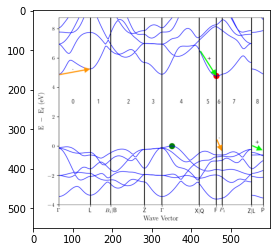

In [14]:
img = mpimg.imread("graphe.png")
plt.imshow(img)
plt.show()

## 3) Masse effective

# Références : 
Bande interdite : [pymatgen.electronic_structure.dos module](https://pymatgen.org/pymatgen.electronic_structure.dos.html?highlight=dos#pymatgen.electronic_structure.dos.DOS) Page sur laquelle j'ai trouvé la fonction a utilisé pour déterminer la bande interdite.